In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.cbook import boxplot_stats
import random
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
nitelikAdlari=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]

In [10]:
veriSeti=pd.read_csv(
                        "auto-mpg.data",
                        # sep parametresi veri dosyasında sütunların (niteliklerin) birbirinden nasıl ayrıldığını belirten parametredir
                        # "\s+" değeri, verilerin bir veya daha fazla boşluk karakteriyle ayrıldığını belirtmek için kullanılmıştır.
                        sep="\s+", 
                        #Veri dosyasında sütun adları bulunmadığından header = None olarak alınmıştır
                        header=None,
                        #Sütun adlarının verildiği names parametresine ilk satırda nitelik isimlerinin saklandığı nitelikAdlari isimli değişken verilmiştir.
                        names=nitelikAdlari,
                        #decimal parametresiyle de verideki nümerik niteliklerin ondalıklı sayı ayıracı olarak nokta (.) olduğu belirtilmiştir.  
                        decimal="."
                        )

#veriSeti.dtypes komutuyla veri setinde bulunan niteliklerin veri tipi incelenebilir
veriSeti.dtypes
#cylinders, model_year, origin ***ayrık değerler*** için int64
#mpg, displacement, weight, accleration ***sürekli değerler*** için de float64
#object veri tipi Pandas kütüphanesinde metin veya karışık sayısal ve sayısal olmayan değerler için kullanılmaktadır.

#-Veri setinde bir tek horsepower ve car_name nitelikleri object olarak okunmuştur, 
#oysaki horsepower ondalıklı değerler içerdiğinden bu niteliğin de float64 olması gerekmektedir. 
# horsepower float64 olmamasının sebebi bazı satırların eksik veri olmasından kaynaklanmaktadır. 




<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gokha\AppData\Local\Temp\ipykernel_14260\1279309676.py:5: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [15]:
veriSeti.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Veri Tipi Dönüşümü ve Eksik Verilerin Tamamlanması 

In [17]:
#Genellikle veri setindeki eksik veriler Python’da nan (not a number) ile gösterilmektedir. 
# horsepower niteliğinin veri tipi DataFrame nesnesine özgü .astype() fonksiyonu yardımı ile float64’e dönüştürülmüştür.
veriSeti.loc[veriSeti.horsepower == "?", "horsepower"] = np.nan
veriSeti.horsepower=veriSeti.horsepower.astype("float64")

In [21]:
# Hangi nitelikte kaç adet eksik değer var görmek için aşağıdaki kod satırı kullanılabilir. 
print(veriSeti.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [24]:
# horsepower niteliğindeki eksik verinin tamamlanması için fillna() fonksiyonu kullanılabilir. 
# horsepower sürekli bir nitelik olduğundan nitelikteki eksik veri, o niteliğin ortalaması ile doldurulabilecektir.
veriSeti["horsepower"].fillna(veriSeti["horsepower"].mean().round(0),inplace=True)
print(veriSeti.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


C:\Users\gokha\AppData\Local\Temp\ipykernel_14260\1423930368.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  veriSeti["horsepower"].fillna(veriSeti["horsepower"].mean().round(0),inplace=True)


In [26]:
# veri setinde renk gibi bir kategorik nitelik olsaydı ve eksik değerler içerseydi 
# bu durumda aşağıdaki kod satırında olduğu gibi nitelikte en sık tekrar eden değer eksik değerlerin yerine atanabilecektir.
# veriSeti["renk"].fillna(veriSeti["renk"].mode()[0], inplace=True)

# Veri Ayrıklaştırma

In [29]:
# Nümerik bir niteliğin kategorik hale getirilmesi işlemi veri ayrıklaştırma (data discretization) olarak bilinmektedir.
#auto-mpg veri setinde yalnızca nümerik nitelikler mevcuttur. 
# Veri seti özetinde kategorik bir değişkenin durumunu da görmek adına veri setinin sonuna durum adında yeni bir sütun eklensin
# Aşağıdaki kod satırları kullanarak durum sütununa mpg değeri 23.5’ten düşükse “Düşük”, 23.5 ile 30 arasında ise “Orta”, aksi halde “Yüksek” değerleri yazılsın.
# Pandas kütüphanesinin astype("category") fonksiyonu yardımı ile bu verilen değerlerin kategorik veri tipi olarak ayarlanması sağlanmıştır.

veriSeti["durum"]=veriSeti.mpg.map(lambda x: "Düşük" if x <23.5 else "Orta" if ((x >=23.5) & (x<30)) else "Yüksek"  ).astype("category")
veriSeti.durum.value_counts()

durum
Düşük     208
Orta       98
Yüksek     92
Name: count, dtype: int64

In [36]:
# Benzer işlem pd.cut() fonksiyonu ile aşağıdaki biçimde de yapılabilir.
bolmeKategorileri=["Düşük","Orta","Yüksek"]
bolmeler=[8,23.4,29.9,46.6]
# Fonksiyon ilk olarak ayrıklaştırılmak istenen mpg niteliğini almaktadır
# bins parametresi kategorilerin alt ve üst sınırlarıdır (bolmeler) (alt sınır dahil edilmez, üst sınır dahil edilir
# Örneğin mpg niteliğinde 8’den büyük ve 23.4 dâhil tüm değerler “Düşük”
# 23.4’ten büyük ve 29.9 dâhil tüm değerler “Orta” kategorisi olarak belirlenir.
#  29.9’dan büyük ve 46.6 dâhil tüm değerler “Yüksek” 
# labels parametresine ise kategori adları (bolmeKategorileri) verilir.
veriSeti["durum"]=pd.cut(veriSeti["mpg"],bins=bolmeler,labels=bolmeKategorileri)
#  Böylelikle kullanıcı tarafından belirlenen alt ve üst sınırlar çerçevesinde veri ayrıklaştırma yapılmış olur (Şekil 56).
veriSeti["durum"].value_counts()

durum
Düşük     208
Orta       98
Yüksek     92
Name: count, dtype: int64

In [40]:
# Bunun dışında veri ayrıklaştırma için eşit frekans (equal frequency) yöntemi de kullanılabilir. 
# Her aralıkta yaklaşık eşit sayıda örneğin yer almasına odaklanılır
# Bu işlem için pd.qcut() fonksiyonu kullanılabilir
# Bu fonksiyon, kategorik hale getirilmesi istenen veriyi ve bölme sayısını alır
durum_ef= pd.qcut(veriSeti["mpg"],q=3)
durum_ef.value_counts()

mpg
(8.999, 19.0]     143
(26.933, 46.6]    133
(19.0, 26.933]    122
Name: count, dtype: int64

# Veri Seti Özeti ve Veri Gruplandırma

In [42]:
veriSeti.describe() #Veri Seti Özeti
# kaç adet örnek olduğu (count), 
# ortalama (mean), 
# standart sapma (std), 
# minimum değer (min), 
# kartil (25%), 
# kartil/ortanca değer (50% ya da median), 
# kartil (75%)
# maksimum değer (max)




,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [44]:
pd.set_option("display.max_columns",20)
veriSeti.describe(include="all")
# Kategorik nitelikler için ise; 
# kaç adet örnek içerdiği (count), 
# kaç kategoriye sahip olduğu (unique),
# en yüksek frekansa sahip olan kategorinin adı (top),
# veri setinde o kategoriye sahip kaç örnek olduğu (freq) 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,durum
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto,Düşük
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,208
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864,NaN,NaN
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN,NaN


In [45]:
# Veri özeti incelemesi tamamlandıktan sonra veri setinde farklı nitelikler kullanılarak gruplandırma (aggregation) işlemi gerçekleştirilebilir. 
A=veriSeti[["mpg","durum"]].groupby("durum").mean() # <class 'pandas.core.frame.DataFrame'>
B=veriSeti.groupby("durum")["mpg"].mean() # <class 'pandas.core.series.Series'>

C:\Users\gokha\AppData\Local\Temp\ipykernel_14260\3796725970.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  A=veriSeti[["mpg","durum"]].groupby("durum").mean()
C:\Users\gokha\AppData\Local\Temp\ipykernel_14260\3796725970.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  B=veriSeti.groupby("durum")["mpg"].mean()


In [51]:
A.info()


<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 3 entries, Düşük to Yüksek
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     3 non-null      float64
dtypes: float64(1)
memory usage: 159.0 bytes


In [52]:
B.info()

<class 'pandas.core.series.Series'>
CategoricalIndex: 3 entries, Düşük to Yüksek
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
3 non-null      float64
dtypes: float64(1)
memory usage: 239.0 bytes


In [67]:
veriSeti[["mpg","durum"]].groupby("durum").sum()
veriSeti[["mpg","durum"]].groupby("durum").min()
veriSeti[["mpg","durum"]].groupby("durum").max()
veriSeti[["mpg","durum"]].groupby("durum").std()


C:\Users\gokha\AppData\Local\Temp\ipykernel_14260\2809208787.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  veriSeti[["mpg","durum"]].groupby("durum").sum()
C:\Users\gokha\AppData\Local\Temp\ipykernel_14260\2809208787.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  veriSeti[["mpg","durum"]].groupby("durum").min()
C:\Users\gokha\AppData\Local\Temp\ipykernel_14260\2809208787.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

,mpg
durum,
Düşük,3.353821
Orta,1.783606
Yüksek,3.826343


#  Tekrar Eden Gözlemlerin Bulunması

In [69]:
# Veri setinde eğer farklı satırlarda tamamen aynı değerler mevcutsa tekrar eden gözlemler/örnekler ortaya çıkar
# Bunun gibi tekrar eden gözlemlerin bulunabilmesi için duplicated() fonksiyonu kullanılabilir.
# keep="first" parametresi, tekrar edilen gözlem değeri hariç bu gözlemden sonra tekrar eden diğer gözlemleri True olarak işaretler, 
# diğer gözlemleri False olarak işaretler.
# keep="last" ise bunun tam tersini yapar, yani son tekrar eden gözlem hariç bu gözlemden önce tekrar eden diğer gözlemleri True olarak işaretler, 
# geri kalanlar False olur (

tekrarla_f= veriSeti.duplicated(keep='first')
tekrarla_l= veriSeti.duplicated(keep='last')

In [71]:
# Tekrar eden tüm gözlemleri görebilmek için aşağıdaki Python kodları kullanılabilir.
# Kullanılan veri setinde herhangi bir tekrar eden gözlem değeri olmadığından sonuçta hiçbir şey yazdırılmamıştır
indislerim= tekrarla_f | tekrarla_l
veriSeti[indislerim]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,durum


In [72]:
# Eğer veri setinde tekrar eden gözlemler bulunsaydı, fazla olanları veri setinden çıkarmak için aşağıda verilen Python kodu kullanılabilirdi.
# Bu kod yardımı ile veriSeti DataFrame’inde yer alan tekrar gözlemler çıkarılacak ve son hali ile veriSeti2 olarak kaydedilecektir.
# veriSeti2=veriSeti.drop_duplicates()

# Aykırı Değerlerin Tespiti

C:\Users\gokha\AppData\Local\Temp\ipykernel_14260\1382046864.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="horsepower",data=veriSeti,palette="magma")


<Axes: ylabel='horsepower'>

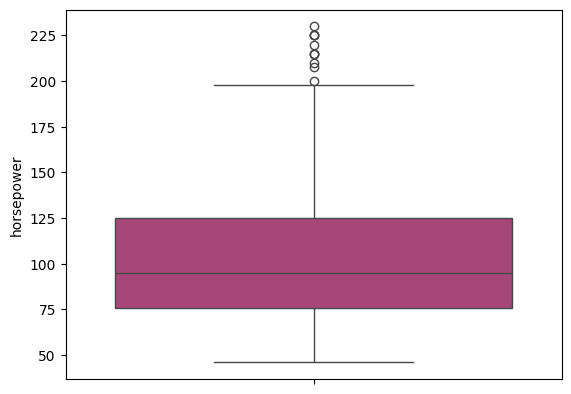

In [84]:
# Aykırı değerler veride diğerlerine göre daha uzak bir noktada olan veri noktalarına verilen isimdir.
# Aykırı değerler, ***saçılım diyagramı ve kutu grafiği*** ile tespit edilebilir.
# Bu bölümde verilen örnekte, horsepower niteliğine ait aykırı değerler kutu grafiğine ilişkin temel istatistiksel değerler yardımı ile elde edilmiştir. 
# İki farklı yol sunulmaktadır.

# I. Yol:
# horsepower niteliğine ait aykırı değerler kutu grafiğinin de çiziminde kullanılan çeyrekler arası aralık (Inter Quartile Range - IQR) 
# hesaplamadan faydalanılarak tespit edilecektir
# Bunun için 1. kartil ve 3. kartil değerleri (q1 ve q2) ile çeyrekler arası aralık (IQR) hesaplanmıştır.
# Buradan hareketle, 1. kartilin bir buçuk IQR katı aşağı noktası alt (alt) sınır
#  3. kartilin bir buçuk IQR katı yukarı noktası üst (ust) 
q1=veriSeti["horsepower"].quantile(0.25)
q3=veriSeti["horsepower"].quantile(0.75)
IQR=q3-q1



alt= q1-1.5*IQR
ust= q3+1.5*IQR

# Böylece artık veri setinde horsepower niteliği belirlenen alt ve üst sınırlar dışında olan değerler aykırı değer olarak kabul edilecektir.
# Aşağıda üst sınırın üzerinde ve alt sınırın altında kalan değerlere sahip örnekler sırasıyla ust_aykiriDegerInd ve alt_aykiriDegerInd değişkenlerine atanmıştır.
ust_aykiriDegerInd= np.where(veriSeti["horsepower"] >=ust)[0]
alt_aykiriDegerInd= np.where(veriSeti["horsepower"] <=alt)[0]

import seaborn as sns 
sns.boxplot(y="horsepower",data=veriSeti,palette="magma")
# Bu durum aşağıdaki kodlar yardımı ile oluşturulan kutu grafiğinden de görülebilir (
# Üst bıyık çizgisinin üzerindeki daireler aykırı değerleri temsil etmektedir
# Oysa alt bıyık noktasının altında daire yoktur.
# Eğer aykırı değerler veri setinden kaldırılmak istenirse aşağıdaki Python kodları çalıştırılabilir.
# veriSeti.drop(index=ust_aykiriDegerInd, inplace=True)


In [94]:
# II. Yol:

# Aykırı değerlerin tespiti ve aykırı değerlere sahip örneklerin veri setinden çıkarılabilmesi için ikinci yol olarak aşağıdaki kod bloğu kullanılabilir.
# Matplotlib kütüphanesinin cbook modülünden boxplot_stats() fonksiyonu çağrılmıştır.
# Yalnızca boxplot_stats(veriSeti.horsepower) kodu çalıştırılırsa kutu grafiğine ilişkin temel istatistiksel bilgiler yazdırılır
aykiriDegerler=boxplot_stats(veriSeti.horsepower).pop(0)["fliers"]
# Bu bilgiler arasında fliers, niteliğe ait aykırı değerleri vermektedir: 220, 215, 225, … Bu aykırı değerlere ait örneklerin indeks numaraları ise aykiriDegerIndeksleri değişkenine atanmıştır
# aykiriDegerIndeksleri yazdırılırsa yukarıdakine benzer şekilde Index([6, 7, 8, 13, 25, 26, 27, 67, 94, 95, 116], dtype='int64') elde edilir.
aykiriDegerlerIndeksleri= veriSeti.index[veriSeti.horsepower.isin(aykiriDegerler)== True]
# veriSeti.drop() ile ilgili indeks numarası verilen aykırı değerlerin bulunduğu örnekler (satırlar axis=0 ile belirtilmiştir) veri setinden silinebilir.
#veriSeti=veriSeti.drop(aykiriDegerlerIndeksleri,axis=0)


Index([6, 7, 8, 13, 25, 26, 27, 67, 94, 95, 116], dtype='int64')

# Rastgele Örnekleme ve Tabakalı Örnekleme

In [137]:
# Örnekleme (sampling), bir popülasyon içinden belirli bir grup temsilcinin seçimi olarak tanımlanabilir.
#  Danışmanlı öğrenme algoritmaları ile çalışılırken veri setini basitçe eğitim ve test veri seti olarak ikiye ayırmak gerekmektedir. 
# Bu bölümde eğitim ve test veri setlerine örneklerin rastgele seçiminin nasıl yapılacağı ve nelere dikkat edileceği sorularına yanıt aranacaktır.
# Python’da rastgele yapılacak işlemler için random modülü ve random modülü içinden sample fonksiyonu çağırılmıştır.
# Ardından listem adlı içinde 1’den 20’ye kadar olan sayıların yer aldığı bir liste tanımlanmıştır.
listem=list(np.arange(1,21))
# Bu liste içinden rastgele 10 örnek seçilmek istendiğinde sample() fonksiyonu kullanılmıştır
sample(listem,10)
# Ardından bu işlem ikinci kere tekrar edilmiştir. 
sample(listem,10)
# Sonuçlar incelenirse sample() fonksiyonunun her seferinde farklı rastgele sayıları döndürdüğü görülecektir. 
# Ayrıca döndürdüğü değerler içinde tekrar eden sayı mevcut değildir. Örneğin; 2, 3, 4, 5 adet gibi.
# Eğer her seferinde aynı rastgele sayıların üretilmesi istenirse random.seed() fonksiyonu kullanılmalıdır
# random.seed(123) fonksiyonu rastgelelik içeren kodun öncesine yazılarak kodun her seferinde aynı rastgele sayıları üretmesi sağlanmıştır
# random.seed() fonksiyonuna 123 yazılması da zorunlu değildir, herhangi bir sayı yazılabilir
# Önemli olan her seferinde aynı rastgele seçimin elde edilebilmesi için seed() içinde aynı sayının kullanılmasıdır (Şekil 68 ve Şekil 69).
random.seed(5)
sample(listem,10)
random.seed(154656798749)
sample(listem,10)

# Seçim yapılırken bir sayının birden fazla kere seçilebilmesine izin vermek için random.choices() fonksiyonu kullanılabilir
random.choices(listem,k=10)

[3, 7, 15, 4, 5, 2, 17, 1, 20, 5]

In [140]:
# auto-mpg veri seti (veriSeti) rastgele %70’i eğitim, %30’u da test veri seti olacak şekilde ikiye ayrılmak istenirse
# sample() fonksiyonu kullanılabilir.
# frac=0.7 öncelikle veri setinden %70’lik bir bölümün alınacağını
# replace=False ise yapılan seçimde her örneğin yalnızca bir kere görülebileceğini söyler.
# random_state parametresi önceki örneklerde kullanılan random.seed() ile benzer görevi görür. Her defasında aynı rastgele örneklerin eğitim veri setinde olmasını sağlar. İ
# İlk satır kullanılarak eğitim veri seti (egitim) elde edilmiş olur.
egıtım= veriSeti.sample(frac=0.7,replace=False,random_state=1)
# Sonrasında veriSeti.index.isin(egitim.index) ile veri setindeki tüm örnekler eğitim veri setine atanmış mı diye kontrol edilir. 
ind= veriSeti.index.isin(egıtım.index)
ind
# Eğer atanmışsa ind değişkeni o indeks değerinde yer alan örnek için True. aksi halde de False değerini alır.
#  Sonrasında test veri setine (test), , eğitimde yer alan örneklerin indeks değerine sahip olmayan tüm örnekler atanır.
# Bunun için veri setinde köşeli parantezler arasında ind değişkeninden önce tilda (~) işareti kullanılmıştır (veriSeti[~ind]).
# Son durumda eğitim veri setinde toplamda 279, test veri setinde ise toplamda 119 örnek olacak şekilde auto-mpg veri seti %70’e %30 oranında ikiye ayrılmıştır. 
test=veriSeti[~ind]

In [142]:
# auto-mpg veri setini (veriSeti) rastgele %70’i eğitim ve %30’u test veri seti olarak ikiye ayrılırken 
# aynı zamanda durum niteliğinin eğitim veri setinde %70 ve test veri setinde %30 oranlarında dağılması için tabakalı ikili ayırma yöntemi kullanılmalıdır.
# Bunun için Scikit-learn kütüphanesi model_selection modülü içinden train_test_split() fonksiyonu çağrılabilir.
# train_test_split() fonksiyonundaki ilk argüman veri setidir (veriSeti).
# Ardından train_size parametresine eğitim veri setinin hangi oranda olacağı bilgisi verilir.Böylelikle geri kalan da test veri setine ayrılmış olur.
# stratify parametresi hangi nitelik kullanılarak tabakalı örneklemenin yapılacağını gösterir. Bu örnekte durum niteliği kullanılmıştır
# Fonksiyon geriye aynı anda hem eğitim hem de test veri setini döndürdüğünden çoklu atama işlemine uygundur. Bu nedenle fonksiyonun döndürdüğü değerler sırasıyla egitim1 ve test1 olarak atanmıştır.
egitim1,test1=train_test_split(veriSeti,train_size=0.7,stratify=veriSeti["durum"])

In [143]:
# Bu yolla elde edilen eğitim (egitim1) ve test (test1) veri setlerinde sırasıyla 278 ve 120 adet örnek yer almaktadır.
veriSeti.durum.value_counts()

durum
Düşük     208
Orta       98
Yüksek     92
Name: count, dtype: int64

In [144]:
egitim1.durum.value_counts()

durum
Düşük     145
Orta       69
Yüksek     64
Name: count, dtype: int64

In [145]:
test1.durum.value_counts()

durum
Düşük     63
Orta      29
Yüksek    28
Name: count, dtype: int64

In [146]:
# Burada durum niteliğine ait Düşük ve Yüksek kategorilerinin arasındaki oranın eğitim ve test veri setlerinde de korunduğuna dikkat edilmelidir.

# Yapay (Dummy) Kodlama

In [147]:
# Veri setindeki kategorik niteliklerin nümerik hale getirilerek analizlerde kullanılması mümkündür. 
# Bu gibi durumlarda nümerik olarak anlam taşımayan yapay (dummy) kodlamadan faydalanılabilir. 
# Pandas kütüphanesindeki get_dummies() fonksiyonuyla yapay (dummy) kodlama yapılmaktadır.
#  durum niteliğinde olduğu gibi kategoriler arasında sıralı bir bağlantı varsa sıra gözetilerek kategoriler artan sayısal değerlere dönüştürülebilir.
#  Bunun için aşağıdaki Python kod satırı kullanılabilir.
# durum niteliğinde .cat.codes yardımı ile 
# “Düşük” için 0, “Orta” için 1, “Yüksek” için de 2 değerleri fonksiyon tarafından otomatik verilerek veri setinde durum_s1 adında yeni bir nitelik oluşturulmuş olur
veriSeti["durum"]

0       Düşük
1       Düşük
2       Düşük
3       Düşük
4       Düşük
        ...  
393      Orta
394    Yüksek
395    Yüksek
396      Orta
397    Yüksek
Name: durum, Length: 398, dtype: category
Categories (3, object): ['Düşük' < 'Orta' < 'Yüksek']

In [148]:
veriSeti["durum_s1"]= veriSeti["durum"].cat.codes

In [149]:
veriSeti["durum_s1"]

0      0
1      0
2      0
3      0
4      0
      ..
393    1
394    2
395    2
396    1
397    2
Name: durum_s1, Length: 398, dtype: int8

In [152]:
# Kategorilerin bu örnekteki gibi sıralı olmadığı varsayılsın
# Bu gibi durumlarda niteliklere ait kategoriler ikili (0, 1) değerlere dönüştürülebilir. 
# Aşağıda verilen kod bloğundaki ilk satırda durum niteliği pd.get_dummies() fonksiyonu yardımı ile ikili-matris forma dönüştürülmüş olur
#  dtype=int eklenmediği takdirde değerleri 0/1 yerine True/False biçimine dönüştürmektedir. . 
#  Ardından pd.concat() fonksiyonu ile durum niteliğinin 0 ve 1’lerden oluşan 398 satır 3 sütunluk matris formu durum_s2 veri setine (veriSeti) eklenmiştir
durum_s2=pd.get_dummies(veriSeti.durum,columns=["durum"],dtype=int)
veriSeti=pd.concat([veriSeti,durum_s2],axis=1)
veriSeti
# pd.concat() fonksiyonundaki axis=1 kullanımı, eklemenin sütun bazında olduğunu söylemektedir. 0 ise satır birleştirmesi için kullanılır.LabelEncoder OneHotEncoder

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,durum,durum_s1,Düşük,Orta,Yüksek,Düşük,Orta,Yüksek,Düşük,Orta,Yüksek
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,Düşük,0,1,0,0,1,0,0,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,Düşük,0,1,0,0,1,0,0,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,Düşük,0,1,0,0,1,0,0,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,Düşük,0,1,0,0,1,0,0,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,Düşük,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,Orta,1,0,1,0,0,1,0,0,1,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,Yüksek,2,0,0,1,0,0,1,0,0,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,Yüksek,2,0,0,1,0,0,1,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,Orta,1,0,1,0,0,1,0,0,1,0


# Veri Normalizasyonu

In [159]:
# ilk örnekte veri setindeki nümerik nitelikler (ilk 7 +sütun) min-maks normalizasyon yöntemi ile 0-1 aralığında normalize edilmiştir
#  Bunun için öncelikle Scikit-learn kütüphanesinde preprocessing modülünden MinMaxScaler fonksiyonu çağrılmıştır
# Ardından normalize edilecek nitelikler veri isminde bir DataFrame nesnesine atanmıştır. 
# MinMaxScaler’e ait scaler adında bir örnek oluşturulmuştur.
#  Önce fit() sonra da transform() fonksiyonları yardımı ile normalizasyon işlemi gerçekleştirilmiştir. 


veri=veriSeti.iloc[:,0:8]
scaler=MinMaxScaler()
scaler.fit(veri)
n_veriSeti=scaler.transform(veri)
# En son satırda bu normalize veri seti (n_veriSeti) sütun adları veri DataFrame’in sütun adları olacak şekilde DataFrame’e dönüştürülmüştür.
n_veriSeti=pd.DataFrame(n_veriSeti,columns=veri.columns)
#  incelendiğinde tüm niteliklerin en büyük değerinin 1, en küçük değerinin 0 olduğu görülecektir.
n_veriSeti


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0


In [160]:
# Aşağıda Python kodu verilen ikinci örnekte nümerik değer içeren ilk 7 sütuna standardizasyon olarak bilinen z-Score yöntemi uygulanmıştır.
# Bunun için öncelikle Scikit-learn kütüphanesinde preprocessing modülünden StandardScaler çağrılmıştır.
#  StandardScaler’e ait scaler adında bir örnek oluşturulmuştur.
stScaler=StandardScaler()
# Ardından normalize edilecek nitelikler veri isminde bir DataFrame nesnesine atanmıştır.
# Bu kez doğrudan fit_transform() foksiyonu yardımı ile standardizasyon işlemi gerçekleştirilmiştir. 
# En son satırda bu normalize veri seti (n_veriSeti) sütun adları veri DataFrame’in sütun adları olacak şekilde DataFrame’e dönüştürülmüştür (Şekil 75).
s_veriSeti=stScaler.fit_transform(veri)
s_veriSeti=pd.DataFrame(s_veriSeti,columns=veri.columns)
s_veriSeti
# Burada unutulmamalıdır ki; her iki örnek için de ya fit() ve transform() gibi iki fonksiyon ya da fit_transform() gibi tek bir fonksiyon ile işlemi gerçekleştirmek mümkündür.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,-0.706439,1.498191,1.090604,0.669381,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.586783,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.193611,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.193611,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.931496,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.483925,-0.213324,0.011586,1.621983,-0.715145
394,2.624265,-0.856321,-0.925936,-1.375115,-0.993671,3.279296,1.621983,0.533222
395,1.087017,-0.856321,-0.561039,-0.536348,-0.798585,-1.440730,1.621983,-0.715145
396,0.574601,-0.856321,-0.705077,-0.667405,-0.408411,1.100822,1.621983,-0.715145
